In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['/usr/share/fonts/urw-base35/URWBookman-Demi.otf',
 '/usr/share/fonts/madan/madan.ttf',
 '/usr/share/fonts/khmeros/KhmerOS_sys.ttf',
 '/usr/share/fonts/wqy-microhei/wqy-microhei.ttc',
 '/usr/share/fonts/google-noto-emoji/NotoEmoji-Regular.ttf',
 '/usr/share/fonts/overpass/Overpass-Light.ttf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-Regular.otf',
 '/usr/share/fonts/lohit-malayalam/Lohit-Malayalam.ttf',
 '/usr/share/fonts/lohit-punjabi/Lohit-Punjabi.ttf',
 '/home/iakovl0000/anaconda3/envs/stochastic/fonts/timesi.ttf',
 '/usr/share/fonts/lohit-marathi/Lohit-Marathi.ttf',
 '/usr/share/fonts/urw-base35/Z003-MediumItalic.otf',
 '/usr/share/fonts/liberation/LiberationSerif-Bold.ttf',
 '/usr/share/fonts/gnu-free/FreeMonoBold.ttf',
 '/usr/share/fonts/open-sans/OpenSans-ExtraBold.ttf',
 '/usr/share/fonts/lohit-tamil/Lohit-Tamil.ttf',
 '/usr/share/fonts/urw-base35/C059-Bold.otf',
 '/usr/share/fonts/urw-base35/NimbusMonoPS-Regular.otf',
 '/usr/share/fonts/urw-base35/URWGothic-Book.otf',
 '

In [3]:
cell_type_names = {
    "somatosensory_converted_into_tpm": "Somatosensory N",
    "Dopaminergic_TPM_clean": "Dopaminergic N",
    "kakadarov_tpm": "CD8+ T cell",
    "Cheng_ES_TPM": "Isolated ESC",
    "Gaublomme_GSE75109_TPM_clean": "Th17 A",
    "Gaublomme_GSE75110_TPM_clean": "Th17 B",
    "Gaublomme_GSE75111_TPM_clean": "Th17 C",
    "Rbp4_positive_cells": "Corticostriatal N",
    "Alveolar_cells_Type_I_Merged_Batches": "Lung ACI",
    "Alveolar_cells_Type_II_Merged_Batches": "Lung ACII",
#     "Alveolar_cells_both_types",
    "klein": "Cultured ESC",
    "hepat_TPM_yang_clean": "Liver HB/HC",
    "Yu_First_wave_endocrine_cells": "Pancreatic EC",
}

In [4]:
fam_df = pd.read_csv("lower_families_to_plot.csv").replace(cell_type_names)

In [5]:
fam_df

,family_name,dataset_name,unit,mean_on_cell_tpm,mean_gene_per_cell,std_gene_per_cell,threshold,ic,ic_mean,ic_lower,...,gene_mean_on_cell_125,gene_name_126,gene_frequency_126,gene_mean_on_cell_126,gene_name_127,gene_frequency_127,gene_mean_on_cell_127,gene_name_128,gene_frequency_128,gene_mean_on_cell_128
0,AMINO ACID TRANSPORTER (PTHR22950),Pancreatic EC,TPM,8631.129164,1.029680,0.700791,142.224250,0.881109,0.880846,0.770230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AMINO ACID TRANSPORTER (PTHR22950),Liver HB/HC,TPM,72.624262,5.382436,0.984786,12.447466,0.772023,0.772278,0.662128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ANION EXCHANGE PROTEIN (PTHR11453),CD8+ T cell,TPM,4.707338,0.261324,0.463344,2.304621,0.930717,0.931481,0.843478,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ANION EXCHANGE PROTEIN (PTHR11453),Th17 A,TPM,24.716872,0.942446,0.739857,7.363755,0.789850,0.788570,0.641808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ANION EXCHANGE PROTEIN (PTHR11453),Somatosensory N,TPM,30.026624,0.995098,0.705346,7.991819,0.832676,0.833057,0.695130,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,BASIGIN RELATED (PTHR10075),Somatosensory N,TPM,233.003320,3.083333,0.641670,21.007272,0.779749,0.780584,0.637123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,BASIGIN RELATED (PTHR10075),Corticostriatal N,TPM,193.688767,3.973684,0.967374,21.898877,0.802385,0.801238,0.650452,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CALCIUM-SENSING RECEPTOR-RELATED (PTHR24061),Lung ACI,UMI,1.000000,0.050633,0.219525,0.500000,0.954677,0.956815,0.935549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CALCIUM-SENSING RECEPTOR-RELATED (PTHR24061),Dopaminergic N,TPM,50.537959,0.152220,0.371210,11.908039,0.958500,0.958966,0.895212,...,NaN,Vmn2r97,0.0,NaN,Vmn2r98,0.0,NaN,Vmn2r99,0.0,NaN
9,CARBONIC ANHYDRASE (PTHR18952),Th17 C,TPM,25.885640,0.662252,0.691736,6.316302,0.868927,0.868355,0.663376,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
m_fam_df = pd.DataFrame()

In [7]:
for i, row in fam_df.iterrows():
    m_fam_df.loc[row.family_name, row.dataset_name] = row.ic
#     print(row.family_name, row.dataset_name, row.ic)

In [8]:
m_fam_df

,Pancreatic EC,Liver HB/HC,CD8+ T cell,Th17 A,Somatosensory N,Corticostriatal N,Lung ACI,Dopaminergic N,Th17 C,Isolated ESC,Th17 B,Lung ACII
AMINO ACID TRANSPORTER (PTHR22950),0.881109,0.772023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ANION EXCHANGE PROTEIN (PTHR11453),NaN,NaN,0.930717,0.789850,0.832676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BASIGIN RELATED (PTHR10075),NaN,NaN,NaN,NaN,0.779749,0.802385,NaN,NaN,NaN,NaN,NaN,NaN
CALCIUM-SENSING RECEPTOR-RELATED (PTHR24061),NaN,NaN,NaN,NaN,NaN,NaN,0.954677,0.958500,NaN,NaN,NaN,NaN
CARBONIC ANHYDRASE (PTHR18952),NaN,0.784707,NaN,NaN,0.760475,NaN,NaN,NaN,0.868927,0.789426,NaN,NaN
ENDOGLIN/TGF-BETA RECEPTOR TYPE III (PTHR14002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957452,NaN,0.822401,NaN,NaN
GLUCOSE TRANSPORTERS* (PTHR23503),0.849112,0.858514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TRIM PROTEINS* (PTHR25465),NaN,NaN,NaN,NaN,0.816192,NaN,NaN,NaN,0.881815,NaN,NaN,NaN
HEXOKINASE (PTHR19443),0.725319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.748215,NaN,NaN
INTERLEUKIN-1 RECEPTOR FAMILY MEMBER (PTHR11890),NaN,NaN,NaN,NaN,NaN,0.860656,NaN,NaN,NaN,0.724841,NaN,NaN


In [9]:
annot_fam_df = pd.DataFrame()
for i, row in fam_df.iterrows():
    annot_fam_df.loc[row.family_name, row.dataset_name] = "{}".format("*" if row.ic_upper >= 1 else "")
#     annot_fam_df.loc[row.family_name, row.dataset_name] = "{:.2f}{}".format(row.ic, "*" if row.ic_upper >= 1 else "")
#     print(row.family_name, row.dataset_name, row.ic)
annot_fam_df = annot_fam_df.fillna("")

In [10]:
annot_fam_df.sort_index(axis=1)

,CD8+ T cell,Corticostriatal N,Dopaminergic N,Isolated ESC,Liver HB/HC,Lung ACI,Lung ACII,Pancreatic EC,Somatosensory N,Th17 A,Th17 B,Th17 C
AMINO ACID TRANSPORTER (PTHR22950),,,,,,,,,,,,
ANION EXCHANGE PROTEIN (PTHR11453),*,,,,,,,,,,,
BASIGIN RELATED (PTHR10075),,,,,,,,,,,,
CALCIUM-SENSING RECEPTOR-RELATED (PTHR24061),,,*,,,,,,,,,
CARBONIC ANHYDRASE (PTHR18952),,,,,,,,,,,,*
ENDOGLIN/TGF-BETA RECEPTOR TYPE III (PTHR14002),,,,,,,,,,,,
GLUCOSE TRANSPORTERS* (PTHR23503),,,,,,,,,,,,
TRIM PROTEINS* (PTHR25465),,,,,,,,,,,,*
HEXOKINASE (PTHR19443),,,,,,,,,,,,
INTERLEUKIN-1 RECEPTOR FAMILY MEMBER (PTHR11890),,*,,,,,,,,,,


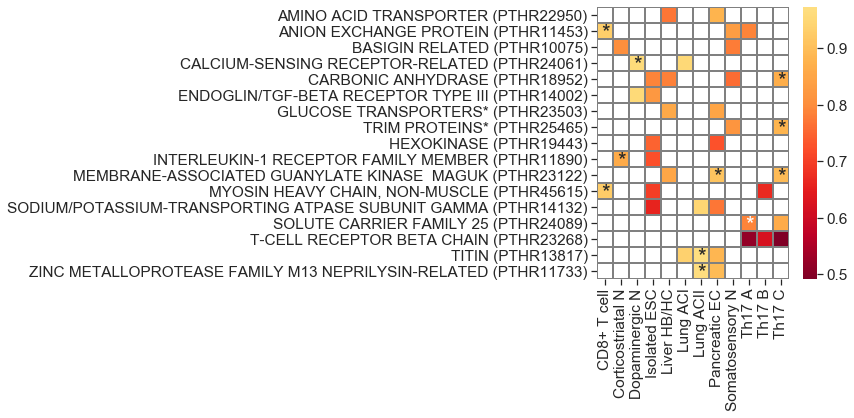

In [12]:
sns.set(font_scale=1.4, style="ticks", font="Arial")
plt.figure(figsize=(5,5))
sns.heatmap(m_fam_df.sort_index(axis=1), cmap="YlOrRd_r", center=0.8, square=True, annot=annot_fam_df.sort_index(axis=1), annot_kws={"size":22, "va": "center_baseline"}, fmt="", xticklabels=True, yticklabels=True, linewidth=1, linecolor="grey")
plt.show()

In [13]:
chr_df = pd.read_csv("lower_chromosomes_to_plot.csv").replace(cell_type_names)

In [14]:
chr_df

,start_gene,end_gene,chromosome,coordinates,Combined name,dataset,units,mean_on_cell_tpm,mean_gene_per_cell,std_gene_per_cell,...,gene_mean_on_cell.17,gene_name.18,gene_frequency.18,gene_mean_on_cell.18,gene_name.19,gene_frequency.19,gene_mean_on_cell.19,gene_name.20,gene_frequency.20,gene_mean_on_cell.20
0,400,407,1,[1 400.0 407.0],#2,Dopaminergic N,TPM,29.126409,0.422833,0.566422,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,400,407,1,[1 400.0 407.0],#2,Pancreatic EC,TPM,91.290853,0.847032,0.710740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,429,436,1,[1 429.0 436.0],#3,Lung ACII,UMI,1.079787,0.117291,0.333052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,429,436,1,[1 429.0 436.0],#3,Lung ACI,UMI,1.000000,0.088608,0.284537,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,535,542,1,[1 535.0 542.0],#4,Corticostriatal N,TPM,12.540256,0.436842,0.547926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,560,567,19,[19 560.0 567.0],#14,Lung ACI,UMI,1.032258,0.078481,0.269268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,53,60,X,[X 53.0 60.0],#27,Th17 A,TPM,33.049769,1.453237,0.724549,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,53,60,X,[X 53.0 60.0],#27,Pancreatic EC,TPM,275.401218,2.009132,0.762333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,704,711,X,[X 704.0 711.0],#28,Dopaminergic N,TPM,104.227795,0.758985,0.541741,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
def get_combined_coordinates(x):
    _chr = str(x.chromosome.iloc[0])
#     _chr = "0"+_chr if len(_chr) == 1 and _chr != "X" else _chr
    if x.name.startswith("#"):
        return pd.Series({"Combined coordinates": "{}: {}-{}".format(_chr,x.start_gene.min(),x.end_gene.max())})
    else:
        return pd.Series({"Combined coordinates": "{}: {}-{} ({})".format(_chr,x.start_gene.min(),x.end_gene.max(),x.name)})
chr_df = chr_df.merge(chr_df.groupby(["Combined name"]).apply(get_combined_coordinates),left_on="Combined name",right_index=True)

In [16]:
chr_df.loc[:,"Combined coordinates"].unique()

array(['1: 400-407', '1: 429-436', '1: 535-542', '2: 154-161',
       '2: 591-598', '2: 1634-1652', '2: 1990-1997', '3: 814-821',
       '5: 769-776', '5: 1186-1193', '6: 242-258 (Trbv)', '7: 53-60',
       '7: 776-798', '7: 1840-1847', '8: 97-104', '10: 700-707',
       '11: 94-101', '11: 639-646', '11: 1444-1451', '15: 65-79',
       '15: 603-610', '17: 381-388', '18: 68-89', '18: 199-219 (Pcdha)',
       '18: 223-237 (Pcdhb)', '18: 243-253 (Pcdhg)', '19: 560-567',
       'X: 53-60', 'X: 704-711'], dtype=object)

In [17]:
m_chr_df = pd.DataFrame(index=chr_df.loc[:,"Combined coordinates"].unique())
for (i, ic) in chr_df.groupby(["Combined coordinates", "dataset"]).min().ic.iteritems():
    m_chr_df.loc[i[0], i[1]] = ic

In [18]:
annot_chr_df = pd.DataFrame(index=chr_df.loc[:,"Combined coordinates"].unique())
for i, row in chr_df.groupby(["Combined coordinates", "dataset"]).min().iterrows():
#     annot_chr_df.loc[i[0], i[1]] = "{:.2f}{}".format(row.ic, ("**" if row.ic >= 1 else "*") if row.ic_upper >= 1 else "")
    annot_chr_df.loc[i[0], i[1]] = "{}".format(("**" if row.ic >= 1 else "*") if row.ic_upper >= 1 else "")
#     print(row.family_name, row.dataset_name, row.ic)
annot_chr_df = annot_chr_df.fillna("")

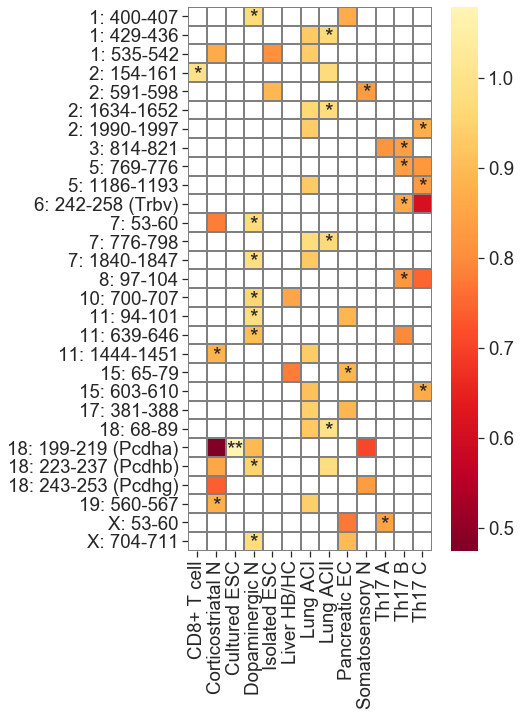

In [20]:
sns.set(font_scale=1.7, style="ticks", font="Arial")
plt.figure(figsize=(7,10))
sns.heatmap(m_chr_df.sort_index(axis=1), cmap="YlOrRd_r", square=True, center=0.8, annot=annot_chr_df.sort_index(axis=1), annot_kws={"size":22, "va": "center_baseline"}, fmt="", xticklabels=True, yticklabels=True, linewidth=1, linecolor="grey")
plt.show()